# K-Means

Este es un algoritmo no supervisado de clustering. La idea es que se le da un conjunto de datos y el algoritmo intenta encontrar grupos de datos que sean similares entre sí. 

Intenta hacer agrupaciones de datos que sean cercanos entre sí. La idea es que los datos que están cerca entre sí pertenecen a un mismo grupo.

El algoritmo funciona de la siguiente manera:

1. Se elige un número de clusters K.
2. Se eligen K puntos al azar en el espacio de los datos. Estos puntos son los centroides de los clusters.
3. Se asigna cada punto de los datos al cluster cuyo centroide está más cerca.
4. Se recalculan los centroides de los clusters.
5. Se repiten los pasos 3 y 4 hasta que los centroides no cambien de posición.
  
<div style="text-align:center">
    <img src="https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif" width="300">
</div>

In [6]:
# Instalación de librerías
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [19]:
# Importación de librerías
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [8]:
# Datos
data = pd.read_csv('./assets/Iris.csv', delimiter=',')
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
# Convertir setosa a 0, versicolor a 1 y virginica a 2
data['Species'] = data['Species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2})
data['Species'].value_counts()


Species
0    50
1    50
2    50
Name: count, dtype: int64

In [10]:
# Correlación
correlation = data.corr()
correlation

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


In [13]:
# Dividir los datos con sklearn
X_train, X_test, y_train, y_test = train_test_split(data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']], data['Species'], test_size=0.2, random_state=0)


In [15]:
# K Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)

KMeans(n_clusters=3, random_state=42)

In [17]:
# Predicciones
y_pred = kmeans.predict(X_test)

In [20]:
# Métricas
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))

Accuracy: 0.1
Confusion Matrix: [[ 0 11  0]
 [13  0  0]
 [ 3  0  3]]
Classification Report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.00      0.00      0.00        13
           2       1.00      0.50      0.67         6

    accuracy                           0.10        30
   macro avg       0.33      0.17      0.22        30
weighted avg       0.20      0.10      0.13        30



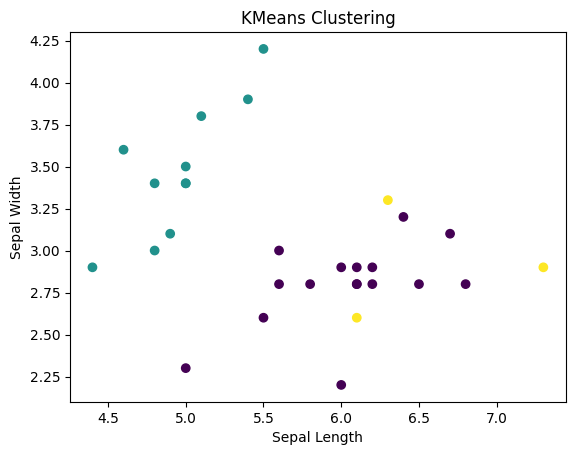

In [21]:
# Graficar clusters
plt.scatter(X_test['SepalLengthCm'], X_test['SepalWidthCm'], c=y_pred, cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('KMeans Clustering')
plt.show()